#Customer Churn Prediction

#Introduction

**What is Customer Churn?**
This is when customers or subscribers to a particular service/product discontinues doing business with that company. (Telecommunication, Banking, E-commerce). Basically, a churner is a user or customer that stops using a company’s products or services.

Churn applications are common in several sectors:

1. **Subscription business companies** (think internet and telephone services providers): customers that are most likely to churn at the end of their subscription are contacted by a call center and offered a discount.
2. **Financial Institutions** (think Bank): automatic e-mails are sent to customers that have been inactive for 6months. 

#Telcommunication Sector and Customer Churn
The telecommunications business has an annual churn rate of 20-40 percent in this highly competitive market (Berson, Smith, & Therling, 1999; Madden, Savage, & Coble-Neal, 1999). 

**To reduce customer churn, companies need to predict which customers are at high risk of churn.**

1. To detect early signs of potential churn, one must first develop a holistic view of the customers and their interactions across numerous channels, including store/branch visits, product purchase histories, customer service calls, Web-based transactions, and social media interactions, to mention a few.

2. As a result, by addressing churn, these businesses may not only preserve their market position, but also grow and thrive. More customers they have in their network, the lower the cost of initiation and the larger the profit. As a result, the company's key focus for success is reducing client attrition and implementing effective retention strategy.




#**Table of Content**

In the given study, we have a **classification problem**.

A classification on the target variable **churn** will be created. 

As the target variable in the given dataset is **"Churn"** in order to make the best classification possible on the target variable, a focus will be on if the target variable is balanced or not.

*   From the Exploratory Analysis below, we are dealing with an imbalanced dataset. 
*   In the last part of this workbook, different classification models will be built and compared to determine the best model for predicgtion on churn. 


#Dataset Insight Analysis

The datasets contains 7043 (customers) and 21 columns (features)

Each row represents a customer, each column contains customer’s attributes 

The data set includes information about:

1. Customers who left within the last month is "Churn" = 1
2. Services that each customer has signed up for – phone, multiple lines, internet, online security, online backup, device protection, tech support, and streaming TV and movies
3. Customer account information – how long they’ve been a customer, contract, payment method, paperless billing, monthly charges, and total charges
4. Demographic info about customers – gender, age range, and if they have partners and dependents



#Problem Definition: 
The proposed framework focuses on predicting the bahaviour to retain customers by collecting customers attribute data such as the (services of each customers, customers account information, browsing history of customers). This information is required to develop and focus on retention programs. Essentially, the aim of our research is to use these user features to predict the behaviourial pattern of customers and detect the risk of customer churn in telecom sectors through utilising Data Mining models and evaluating these models’ performance on predicting of customers churn prediction early.


In this research, our aim is to build a model to predict how likely a customer will churn by analyzing its characteristics: (1) demographic information, (2) account information, and (3) services information. The objective is to obtain a data-driven solution that will allow us to reduce churn rates and, as a consequence, to increase customer satisfaction and corporation revenue

#Objective:
I will explore the data and aim to answer some questions like:

1. What's the percentage of Churn Customers and customers that keep in with the active services?
2. Is there any patterns in Churn Customers based on the gender?
3. Is there any patterns/preference in Churn Customers based on the type of service provided?
4. What's the most profitable service types?
5. Which features and services are most profitable?
6. Many more questions that will arise during the analysis

#Outline:
1. Visualize missing values
2. Data Manipulation
3. Data Visualization
4. Data Preprocessing
*   Standardizing numeric attributes

Machine Learning Classification Model Evaluations and Predictions


1. Random Forest
2. Logistic Regression
3. Decision Tree Classifier
4. XGBOOST



Conclusion


In [1]:
#Imported Libraries
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import numpy as np # linear algebra
pd.set_option('display.max_columns', None)

import missingno as msno
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')




#Visualization
import plotly.express as px #for visualization
import matplotlib.pyplot as plt #for visualization 


#Other Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

# Classifier Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import recall_score, confusion_matrix, precision_score, f1_score, accuracy_score, classification_report


#Get overview of the data
def dataoveriew(df, message):
    print(f'{message}:\n')
    print('Number of rows: ', df.shape[0])
    print("\nNumber of features:", df.shape[1])
    print("\nData Features:")
    print(df.columns.tolist())
    print("\nMissing values:", df.isnull().sum().values.sum())
    print("\nUnique values:")
    print(df.nunique())
    



In [2]:
#loading data
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [3]:
dataoveriew(df, 'Overview of the dataset')

Overview of the dataset:

Number of rows:  7043

Number of features: 21

Data Features:
['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

Missing values: 0

Unique values:
customerID          7043
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64


In [4]:
#Understanding the Dataset 

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


`The dataset contians 7043 rows & 21 columns. 

Target Variable (Predict

Churn: Whether the customer churned or not (Yes or No)

**Categorical** features are **17** as seen below:

1. **CustomerID:** Customer ID unique for each customer
2.**Gender**: Whether the customer is a male or a female
3. **SeniorCitizen:** Whether the customer is a senior citizen or not (1, 0)
4. **Partner:** Whether the customer has a partner or not (Yes, No)
5. **Dependent:** Whether the customer has dependents or not (Yes, No)
6. **PhoneService:** Whether the customer has a phone service or not (Yes, No)
7. **MultipeLines:** Whether the customer has multiple lines or not (Yes, No, No phone service)
8. **InternetService:** Customer’s internet service provider (DSL, Fiber optic, No)
9. **OnlineSecurity:** Whether the customer has online security or not (Yes, No, No internet service)
10. **OnlineBackup:** Whether the customer has an online backup or not (Yes, No, No internet service)
11. **DeviceProtection:** Whether the customer has device protection or not (Yes, No, No internet service)
12. **TechSupport:** Whether the customer has tech support or not (Yes, No, No internet service)
13. **StreamingTV:** Whether the customer has streaming TV or not (Yes, No, No internet service)
14. **StreamingMovies:** Whether the customer has streaming movies or not (Yes, No, No internet service)
15. **Contract:** The contract term of the customer (Month-to-month, One year, Two years)
16. **PaperlessBilling:** Whether the customer makes paperless billing (Yes, No)
17. **PaymentMethod:** The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))


**Numerical** features are **3** as seen below:

*  **Tenure:** Number of months the customer has stayed with the company
*   **MonthlyCharges:** The amount charged to the customer monthly
*   **TotalCharges:** The total amount charged to the customer

All these feature above can further be subdivided to:

1. **Demographic Customer information:**
*     Gender, Dependants, SeniorCitizens, Partner
2. **Services signed up by customers:**
*     PhoneService, Multiplelines, InternetService,OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTv, StreamingMovies.
3.  **Customer Account Information:**
*  Tenure, Contract, PaperlessBilling, PaymentMethod , MonthlyCharges, TotalCharges




In [5]:
 #The customerID column isnt useful as the feature is used for identification of customers. 
df.drop(["customerID"],axis=1,inplace = True)

**Exploratory Data Analysis**

In [6]:
#Exploring the Target Variable:

target_instance = df["Churn"].value_counts().to_frame()
target_instance = target_instance.reset_index()
target_instance = target_instance.rename(columns={'index': 'Category'})
fig = px.pie(target_instance, values='Churn', names='Category', color_discrete_sequence=["green", "red"],
             title='Churn Rate Distribution')
fig.show()

The goal is to predict customers that left the company in the previous month. 
This is a binary classification problem with an unbalanced target.

* Churn: No – 73.5%
* Churn: Yes – 26.5%
Let’s explore categorical features.

In [7]:
# Frequency of classes of dependent variable
df["Churn"].value_counts()

No     5174
Yes    1869
Name: Churn, dtype: int64

#Visualization

**#Dividing Features Into Numerical and Categorical variables:**

In [8]:
col = list(df.columns)
categorical_features = []
numerical_features = []
for i in col:
    if len(df[i].unique()) > 6:
        numerical_features.append(i)
    else:
        categorical_features.append(i)

print('Categorical Features :',*categorical_features)
print('Numerical Features :',*numerical_features)

Categorical Features : gender SeniorCitizen Partner Dependents PhoneService MultipleLines InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport StreamingTV StreamingMovies Contract PaperlessBilling PaymentMethod Churn
Numerical Features : tenure MonthlyCharges TotalCharges


In [9]:
#Defining bar chart function
def bar(feature, df=df):
    #Grouping the Categorical Feature
    temp_df = df.groupby([feature, 'Churn']).size().reset_index()
    temp_df = temp_df.rename(columns={0:'Count'})
    #Calculate the value counts of each distribution and it's corresponding Percentages
    value_counts_df = df[feature].value_counts().to_frame().reset_index()
    categories = [cat[1][0] for cat in value_counts_df.iterrows()]
    #Calculate the value counts of each distribution and it's corresponding Percentages
    num_list = [num[1][1] for num in value_counts_df.iterrows()]
    div_list = [element / sum(num_list) for element in num_list]
    percentage = [round(element * 100,1) for element in div_list]
    #Defining string formatting for graph annotation
    #Numeric section
    def num_format(list_instance):
        formatted_str = ''
        for index,num in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{num}%, ' #append to empty string(formatted_str)
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{num}% & '
            else:
                formatted_str=formatted_str+f'{num}%'
        return formatted_str
    #Categorical section
    def str_format(list_instance):
        formatted_str = ''
        for index, cat in enumerate(list_instance):
            if index < len(list_instance)-2:
                formatted_str=formatted_str+f'{cat}, '
            elif index == len(list_instance)-2:
                formatted_str=formatted_str+f'{cat} & '
            else:
                formatted_str=formatted_str+f'{cat}'
        return formatted_str


    #Running the formatting functions
    num_str = num_format(percentage)
    cat_str = str_format(categories)
    
    #Setting graph framework
    fig = px.bar(temp_df, x=feature, y='Count', color='Churn', title=f'Churn rate by {feature}', barmode="group", color_discrete_sequence=["green", "red"])
    fig.add_annotation(
                text=f'Value count of distribution of {cat_str} are<br>{num_str} percentage respectively.',
                align='left',
                showarrow=False,
                xref='paper',
                yref='paper',
                x=1.4,
                y=1.3,
                bordercolor='black',
                borderwidth=1)
    fig.update_layout(
        # margin space for the annotations on the right
        margin=dict(r=400),
    )
     
    return fig.show()

In [10]:
l1 = ['gender','SeniorCitizen','Partner','Dependents'] # Demographic Customer information
l2 = ['PhoneService','MultipleLines','InternetService','StreamingTV','StreamingMovies',
      'OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport'] # Services Signed up for by Customers
l3 = ['Contract','PaperlessBilling','PaymentMethod'] # Customer Account Information

#**CATEGORICAL VARIABLE GROUP 1: "Ploting Demographic Customer Information"**

Demographic Analysis
*   **Gender** is evenly distributed and shows that Female has a slightly higher churn rate than Male. (This difference is insignificant and can be ignored.
*   **Partner**: Lower churn rate at **669** when living with partners and Higher Churn rate at **1200** when living alone  
*   **SeniorCitizens**: Those that are Seniorcitizen have a lower churn rate when compared to the young group. The demographic section of data highlights on-senior citizens with no partners and dependents as a particular segment of customers likely to churn.




In [11]:
##Group 1:
#colors = ['#008080','#CC3300']
#fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
#for i in range(len(l1)):
    #plt.subplot(2,2,i+1)
    #ax = sns.countplot(l1[i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    #for rect in ax.patches:
        #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    #title = l1[i] + ' vs Churn'
    #plt.title(title);

#**CATEGORICAL VARIABLE GROUP 2: "Services signed up by customers"**

These are services signed up by each customer: 

These features show significant variations across their values.
1.   90.3% of customers have phoneservices, these customers have a higher rate to churn. Also, if a customer does not have phone service, they cannot have multiple lines. 
2. Internet service: Those customers who signed up on fibre optic as an internet service have a higher rate count for churn. There are differnt reasons for this. 
*   Higher prices than other internet service
*   Poor customer service
*   Higher Competitiveness

3. Customers with OnlineSecurity, OnlineBackup, DeviceProtection, and TechSupport are more unlikely to churn.Streaming service is not predictive for churn as it’s evenly distributed to yes and no options.

In [12]:
#fig = plt.subplots(nrows = 2,ncols = 2,figsize = (20,14))
#for i in range(len(l2[-4:])):
    #plt.subplot(2,2,i + 1)
    #ax = sns.countplot(l2[-4 + i],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
    #for rect in ax.patches:
        #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
    #title = l2[-4 + i] + ' vs Churn'
    #plt.title(title);

**TotalCharges vs Group 2: Services Subscribed by the Customer : PhoneService | MultipleLines | InternetService | StreamingTV | StreamingMovies|**


1. TotalCharges of PhoneService range from 0 - 4000. Although, customers start getting 2nd thoughts about PhoneService due to TotalCharges from around 1000.

2. Also, customers start to hesitate to pay around 2000 for MultipleLines. However, some customers seem to be desperate for MultipleLines as they paid a value of around 6000 for it.
3. When it comes to paying for Fiber Optic cables, customers test out the products by paying around 2000
4. Similar to Fiber Optic, StreamingTV & StreamingMovies, customers that continue with the services pay from 3000 - 6000.

In [13]:
#fig = plt.subplots(nrows = 1,ncols = 2,figsize = (15,5))

#for i in range(len(l2[0:2])):
    #plt.subplot(1,2,i + 1)
    #ax = sns.boxplot(x = l2[i],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    #plt.title('tenure vs ' + l2[i]);

#fig = plt.subplots(nrows = 1, ncols = 1, figsize = (6,5))

#plt.subplot(1,1,1)
#ax = sns.boxplot(x = l2[2],y = 'tenure',data = df,hue = 'Churn',palette = colors);
#plt.title('tenure vs ' + l2[2]);
    
#fig = plt.subplots(nrows = 1,ncols = 2,figsize = (12,5))

#for i in range(len(l2[3:5])):
    #plt.subplot(1,2,i + 1)
    #ax = sns.boxplot(x = l2[i + 3],y = 'tenure',data = df,hue = 'Churn',palette = colors);
    #plt.title('tenure vs ' + l2[i + 3]);

#**CATEGORICAL VARIABLE GROUP 3: "Customer Account Information":**

**Payment Insights:** 
*   **Contract:** Month-to-Month contract contract (a shorter term contract yields a higher churn rate). Those with more extended plans face additional barriers when canceling early. 
* This clearly explains the motivation for companies to have long-term relationships with their customers. Churn Rate is higher for the customers who opted for paperless billing. 
* About 59.2% (1071 customer) of customers use paperless billing. Customers who pay with electronic checks are more likely to churn, and this kind of payment is more common than other payment types.

In [14]:
#fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))

#plt.subplot(1,3,1)
#ax = sns.countplot(l3[0],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
#for rect in ax.patches:
    #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
#title = l3[0] + ' vs Churn'
#plt.title(title);

#plt.subplot(1,3,2)
#ax = sns.countplot(l3[1],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
#for rect in ax.patches:
    #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
#title = l3[1] + ' vs Churn'
#plt.title(title);

#plt.subplot(1,3,3)
#ax = sns.countplot(l3[2],data = df,hue = "Churn",palette = colors,edgecolor = 'black')
#for rect in ax.patches:
    #ax.text(rect.get_x() + rect.get_width() / 2, rect.get_height() + 2, rect.get_height(), horizontalalignment='center', fontsize = 11)
#title = l3[2] + ' vs Churn'
#plt.title(title);

In [15]:
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

**Predicting Error on Total Charges "data type:** The data type for total charges is classified as object meaning there is a string component. 

In [16]:
# Ascertaining the error
try:
    df['TotalCharges'] = df['TotalCharges'].astype(float)
except ValueError as ve:
    print (ve)

could not convert string to float: ' '


There is indication that some empty values are stored as empty spaces. Next is to transform the feature into a numerical format while equating these empty string spaces as NaN:

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')
#Fill the missing values with with the median value
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].median())

Next, let’s plot the histogram of all the numeric features to understand the distribution:

In [18]:
# Defining the histogram plotting function
def hist(feature):
    group_df = df.groupby([feature, 'Churn']).size().reset_index()
    group_df = group_df.rename(columns={0: 'Count'})
    fig = px.histogram(group_df, x=feature, y='Count', color='Churn', marginal='box', title=f'Churn rate frequency to {feature} distribution', color_discrete_sequence=["green", "red"])
    fig.show()

#Numerical Variable 



In [19]:
hist('tenure')
hist('MonthlyCharges')
hist('TotalCharges')

Information on customer's account: 

**Tenure:** The histogram is symetric/skewed to the right.
1. The tunure customers have been with the telecommunication is between (0-9months). 
2. The highest churn rate also falls within (0-9months)
3. In the first 30months the plot shows 75% od cusomers exist the telecommunication company. 

**Monthly Charge:**
1. Clients with higher monthly charges have a higher churn rate than those with lower monthly charges. Therefore, As a retention measure,  the telecommunication industry should focus on adopting promotions and discounts for all clients) 



**Binning the numerical features into three sections  (low, medium, and high to derive new information)**

As predicted from the chart below, after binning, 
1. low tenure and high monthly charge bins have higher churn rates, 
2. Low Total charge bin has a higher churn rate. 
If the total charge is lower why will the churn rate be higher?

In [20]:
#Create an empty dataframe
bin_df = pd.DataFrame()

#Update the binning dataframe
bin_df['tenure_bin'] =  pd.qcut(df['tenure'], q=3, labels= ['low', 'medium', 'high'])
bin_df['MonthlyCharges_bin'] =  pd.qcut(df['MonthlyCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['TotalCharges_bin'] =  pd.qcut(df['TotalCharges'], q=3, labels= ['low', 'medium', 'high'])
bin_df['Churn'] = df['Churn']

#Plot the bar chart of the binned variables
bar('tenure_bin', bin_df)
bar('MonthlyCharges_bin', bin_df)
bar('TotalCharges_bin', bin_df)

#Data Maniplulation

**Looking for missing Value**
No missing value found

In [21]:
df.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [22]:
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
df[numerical_cols].describe()

,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000
mean,32.371149,64.761692,2281.916928
std,24.559481,30.090047,2265.270398
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,402.225000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3786.600000
max,72.000000,118.750000,8684.800000


Correlation measures the linear relationship between two variables. Features with high correlation are more linearly dependent and have almost the same effect on the dependent variable. So, when two features have a high correlation, we can drop one of them. In our case, we can drop highly correlated features like MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies.

Churn prediction is a binary classification problem, as customers either churn or are retained in a given period. Two questions need answering to guide model building:

Which features make customers churn or retain?
What are the most important features to train a model with high performance?
Let’s use the Correlation Analysis to gain some statistics of the respective features with the target.

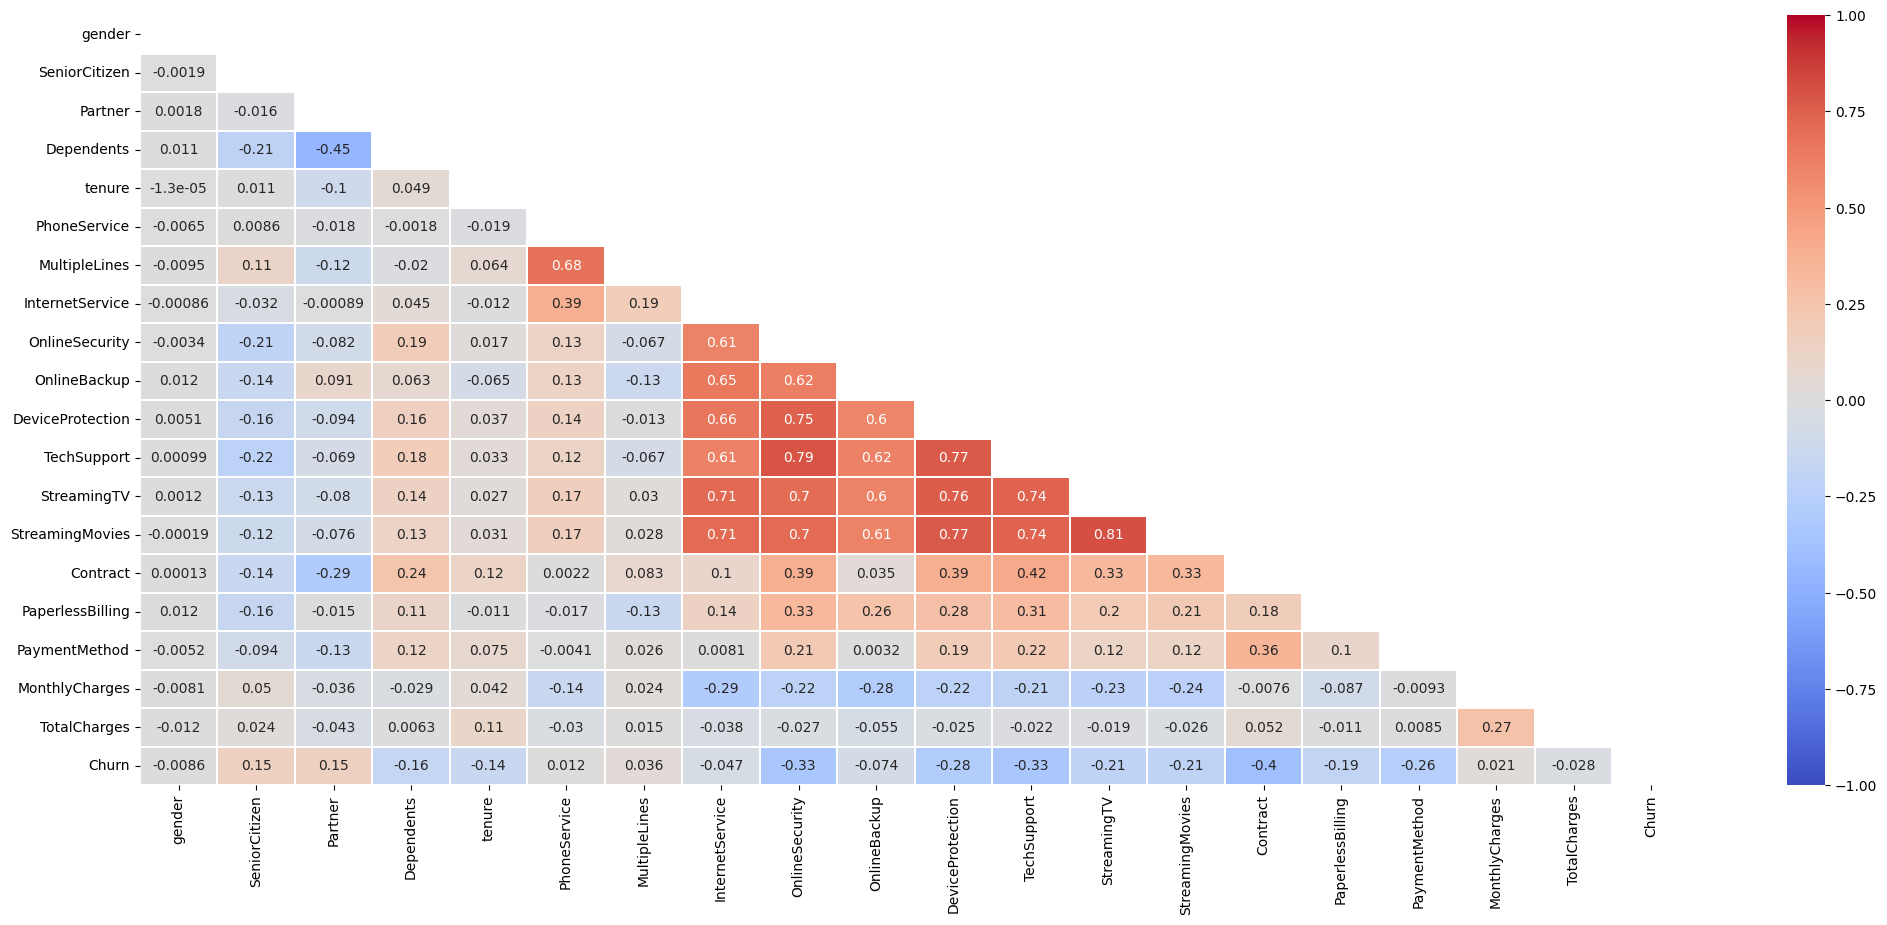

In [23]:
plt.figure(figsize=(25, 10))

corr = df.apply(lambda x: pd.factorize(x)[0]).corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

ax = sns.heatmap(corr, mask=mask, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, linewidths=.2, cmap='coolwarm', vmin=-1, vmax=1)

#Features Selection: Categorical Variable

Above it can be seen that phoneService, gender, StreamingTV, StreamingMovies, MultipleLines and InternetService display a very low relation with Churn.

**Features Selection: Numerical Features**

ANOVA Test

According to the ANOVA test, higher the value of the ANOVA score, higher the importance of the feature.
From the above results, we need to include all the numerical features for modeling.

In [24]:
from sklearn.feature_selection import f_classif

In [25]:
#from sklearn.feature_selection import SelectKBest
#from sklearn.feature_selection import chi2,mutual_info_classif

#features = df.loc[:,numerical_features]
#target = df.loc[:,'Churn']

#best_features = SelectKBest(score_func = f_classif,k = 'all')
#fit = best_features.fit(features,target)

#featureScores = pd.DataFrame(data = fit.scores_,index = list(features.columns),columns = ['ANOVA Score']) 

#plt.subplots(figsize = (5,5))
#sns.heatmap(featureScores.sort_values(ascending = False,by = 'ANOVA Score'),annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',fmt = '.2f');
#plt.title('Selection of Numerical Features')

In [26]:
def object_to_int(dataframe_series):
    if dataframe_series.dtype=='object':
        dataframe_series = LabelEncoder().fit_transform(dataframe_series)
    return dataframe_series

df = df.apply(lambda x: object_to_int(x))
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


In [27]:
plt.figure(figsize=(14,7))
df.corr()['Churn'].sort_values(ascending = False)

Churn               1.000000
MonthlyCharges      0.193356
PaperlessBilling    0.191825
SeniorCitizen       0.150889
PaymentMethod       0.107062
MultipleLines       0.038037
PhoneService        0.011942
gender             -0.008612
StreamingTV        -0.036581
StreamingMovies    -0.038492
InternetService    -0.047291
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.178134
OnlineBackup       -0.195525
TotalCharges       -0.199037
TechSupport        -0.282492
OnlineSecurity     -0.289309
tenure             -0.352229
Contract           -0.396713
Name: Churn, dtype: float64

<Figure size 1400x700 with 0 Axes>

In [28]:
import imblearn
from collections import Counter
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

Defining X and y

In [29]:
  X = df.drop(columns = ['Churn'])
  y = df['Churn'].values

In [30]:
print('Before OverSampling, the shape of X: {}'.format(X.shape)) 
print('Before OverSampling, the shape of y: {} \n'.format(y.shape)) 
  
print("Before OverSampling, counts of label '1': {}".format(sum(y == 1))) 
print("Before OverSampling, counts of label '0': {}".format(sum(y == 0)))

Before OverSampling, the shape of X: (7043, 19)
Before OverSampling, the shape of y: (7043,) 

Before OverSampling, counts of label '1': 1869
Before OverSampling, counts of label '0': 5174


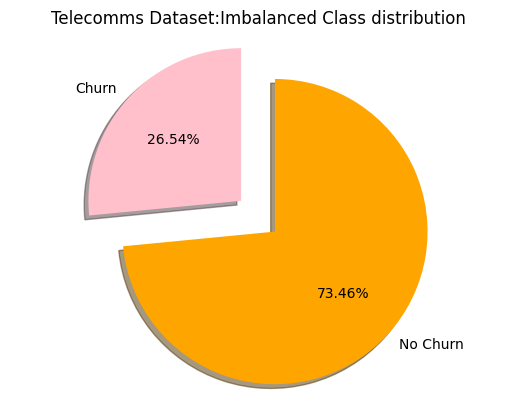

# samples of dataset with No Churn: 5174
# samples of dataset with Churn: 1869


In [31]:
from imblearn.over_sampling import SMOTE 
# Creating dataset
_, class_row_count = np.unique(y, return_counts=True)
class_row_name = ['No Churn', 'Churn']
fig, ax = plt.subplots()
sm = SMOTE(random_state=33)
X_res, y_res = sm.fit_resample(X, y.ravel())

# Creating color parameters
colors = ("orange", "pink")

# Creating plot
ax.pie(class_row_count, labels=class_row_name, autopct='%1.2f%%',
        shadow=True, explode=[0.3,0], colors = colors, startangle=90, counterclock=False)
ax.axis('equal')  
ax.set_title('Telecomms Dataset:Imbalanced Class distribution')

plt.show()
print("# samples of dataset with No Churn: {}".format(class_row_count[0]))
print("# samples of dataset with Churn: {}".format(class_row_count[1]))

#Data Balancing Using SMOTE
or this dataset, i have chosen the approach of oversampling and not undersampling to avoid loosing significant information when an undersampling method is used.

In [32]:
# create the  object with the desired sampling strategy.
#from imblearn.over_sampling import SMOTE
#oversample = SMOTE()
#smote = SMOTE(sampling_strategy='minority')

# fit the object to our training data
#X, y = oversample.fit_resample(df.loc[:,df.columns!='Churn'], df['Churn'])
#print("Shape of X: {}".format(X.shape))
#print("Shape of y: {}".format(y.shape))
#plt.show()

#Splitting Dataset Training= 70% Testing= 20%

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=11)

In [34]:
y_train.shape, y_test.shape

((5634,), (1409,))

#Features Scaling

In [35]:
from sklearn.preprocessing import StandardScaler
Scaler_X = StandardScaler()
X_train = Scaler_X.fit_transform(X_train)
X_test = Scaler_X.transform(X_test)

# **Handling class imbalance using SMOTE based techniques:**
## A) SMOTE Technique

In [36]:
from imblearn.over_sampling import SMOTE

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
#X_train, y_train = smt.fit_resample(X_train, y_train)
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({0: 4139, 1: 1495})
After Counter({1: 4139, 0: 4139})


## B) ADASYN Technique


In [37]:
from imblearn.over_sampling import ADASYN

counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
X_train_ada, y_train_ada = ada.fit_resample(X_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({0: 4139, 1: 1495})
After Counter({1: 4155, 0: 4139})


#**MODEL SELECTION**

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

In [39]:
model = []
resample = []
precision = []
recall = []
F1score = []
AUCROC = []

In [40]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    print('AUC-ROC')
    print('='*60)
    print(roc_auc_score(y_test, y_prob[:,1]))
          
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    AUCROC.append(roc_auc_score(y_test, y_prob[:,1]))
    resample.append(sampling)

# **Model-1: Logistic Regression:**

1. Original Unsampled Data:

In [41]:
log_model=LogisticRegression()

params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}

cv = StratifiedKFold(n_splits=10, random_state=100, shuffle=True)

# Create grid search using 10-fold cross validation
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

In [42]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'actual')

Confusion Matrix
[[931 104]
 [181 193]] 

Classification Report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1035
           1       0.65      0.52      0.58       374

    accuracy                           0.80      1409
   macro avg       0.74      0.71      0.72      1409
weighted avg       0.79      0.80      0.79      1409
 

AUC-ROC
0.8457865095972512


# 2. SMOTE Resampling:

In [43]:
clf_LR.fit(X_train_sm, y_train_sm)
clf_LR.best_estimator_

LogisticRegression(C=10.0)

In [44]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'smote')

Confusion Matrix
[[768 267]
 [ 73 301]] 

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.74      0.82      1035
           1       0.53      0.80      0.64       374

    accuracy                           0.76      1409
   macro avg       0.72      0.77      0.73      1409
weighted avg       0.81      0.76      0.77      1409
 

AUC-ROC
0.84494432819241


## 3.ADASYN Resampling:


In [45]:
clf_LR.fit(X_train_ada, y_train_ada)
clf_LR.best_estimator_

LogisticRegression(C=10.0, class_weight='balanced')

In [46]:
test_eval(clf_LR, X_test, y_test, 'Logistic Regression', 'adasyn')

Confusion Matrix
[[713 322]
 [ 56 318]] 

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.69      0.79      1035
           1       0.50      0.85      0.63       374

    accuracy                           0.73      1409
   macro avg       0.71      0.77      0.71      1409
weighted avg       0.81      0.73      0.75      1409
 

AUC-ROC
0.8464917719393423


# **Model 2: Random Forest:**

In [47]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

# 1. Original Unsampled Data:

In [48]:
rf_model = RandomForestClassifier()

rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}

clf_RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)

clf_RF.fit(X_train, y_train)
clf_RF.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomForestClassifier(max_depth=9, min_samples_split=20, n_estimators=30)

In [49]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'actual')

Confusion Matrix
[[955  80]
 [206 168]] 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.68      0.45      0.54       374

    accuracy                           0.80      1409
   macro avg       0.75      0.69      0.70      1409
weighted avg       0.78      0.80      0.78      1409
 

AUC-ROC
0.8442145237541657


## 2.SMOTE Resampling


In [50]:
clf_RF.fit(X_train_sm, y_train_sm)
clf_RF.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomForestClassifier(max_depth=13, min_samples_split=15, n_estimators=50)

In [51]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'smote')

Confusion Matrix
[[853 182]
 [128 246]] 

Classification Report
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      1035
           1       0.57      0.66      0.61       374

    accuracy                           0.78      1409
   macro avg       0.72      0.74      0.73      1409
weighted avg       0.79      0.78      0.78      1409
 

AUC-ROC
0.8386602598878813


# 3.ADASYN Resampling:

In [52]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomForestClassifier(max_depth=15, min_samples_split=5)

In [53]:
test_eval(clf_RF, X_test, y_test, 'Random Forest', 'adasyn')

Confusion Matrix
[[852 183]
 [137 237]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.56      0.63      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409
 

AUC-ROC
0.8350977808778322


# **Decision Tree:**

## 1. Original Unsampled Data

In [54]:
tree_model = DecisionTreeClassifier()

tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}

clf_DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
clf_DT.fit(X_train, y_train)
clf_DT.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=20)

In [55]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'actual')

Confusion Matrix
[[935 100]
 [198 176]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.47      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.70      1409
weighted avg       0.78      0.79      0.78      1409
 

AUC-ROC
0.829420806530781


## 2.SMOTE Resampling


In [56]:
clf_DT.fit(X_train_sm, y_train_sm)
clf_DT.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(max_depth=11, min_samples_leaf=5, min_samples_split=50)

In [57]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'smote')

Confusion Matrix
[[864 171]
 [147 227]] 

Classification Report
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1035
           1       0.57      0.61      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.72      1409
weighted avg       0.78      0.77      0.78      1409
 

AUC-ROC
0.8116174533054328


## 3.ADASYN Resampling:

In [58]:
clf_DT.fit(X_train_ada, y_train_ada)
clf_DT.best_estimator_

Fitting 10 folds for each of 10 candidates, totalling 100 fits


DecisionTreeClassifier(max_depth=13, min_samples_split=100)

In [59]:
test_eval(clf_DT, X_test, y_test, 'Decision Tree', 'adasyn')

Confusion Matrix
[[834 201]
 [135 239]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83      1035
           1       0.54      0.64      0.59       374

    accuracy                           0.76      1409
   macro avg       0.70      0.72      0.71      1409
weighted avg       0.78      0.76      0.77      1409
 

AUC-ROC
0.8132669405047923


# **XGBOOST:**
##1. Original Unsampled Data

In [60]:
xgb_model = XGBClassifier()

xgb_params={}

clf_XGB = RandomizedSearchCV(xgb_model, xgb_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_XGB.fit(X_train, y_train)
clf_XGB.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [61]:
test_eval(clf_XGB, X_test, y_test, 'XGBoost', 'actual')

Confusion Matrix
[[931 104]
 [193 181]] 

Classification Report
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1035
           1       0.64      0.48      0.55       374

    accuracy                           0.79      1409
   macro avg       0.73      0.69      0.71      1409
weighted avg       0.78      0.79      0.78      1409
 

AUC-ROC
0.823366658916531


## 2.SMOTE Resampling

In [62]:
clf_XGB.fit(X_train_sm, y_train_sm)
clf_XGB.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [63]:
test_eval(clf_RF, X_test, y_test, 'XGBoost', 'smote')

Confusion Matrix
[[852 183]
 [137 237]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.82      0.84      1035
           1       0.56      0.63      0.60       374

    accuracy                           0.77      1409
   macro avg       0.71      0.73      0.72      1409
weighted avg       0.78      0.77      0.78      1409
 

AUC-ROC
0.8350977808778322


## 3.ADASYN Resampling

In [64]:
clf_RF.fit(X_train_ada, y_train_ada)
clf_RF.best_estimator_

Fitting 10 folds for each of 20 candidates, totalling 200 fits


RandomForestClassifier(max_depth=15, min_samples_split=15, n_estimators=50)

In [65]:
test_eval(clf_RF, X_test, y_test, 'XGBoost', 'adasyn')

Confusion Matrix
[[842 193]
 [136 238]] 

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.84      1035
           1       0.55      0.64      0.59       374

    accuracy                           0.77      1409
   macro avg       0.71      0.72      0.71      1409
weighted avg       0.78      0.77      0.77      1409
 

AUC-ROC
0.8362357591257847


# SVM

In [66]:
from sklearn.svm import SVC

In [67]:
svm_model = SVC(kernel='rbf',probability=True)

svm_params={}

clf_svm = RandomizedSearchCV(svm_model, svm_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
clf_svm.fit(X_train, y_train)
clf_svm.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


SVC(probability=True)

In [68]:
test_eval(clf_svm, X_test, y_test, 'SVM', 'actual')

Confusion Matrix
[[955  80]
 [209 165]] 

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.92      0.87      1035
           1       0.67      0.44      0.53       374

    accuracy                           0.79      1409
   macro avg       0.75      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409
 

AUC-ROC
0.7883257123666331


# SMOTE

In [69]:
clf_svm.fit(X_train_sm, y_train_sm)
clf_svm.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


SVC(probability=True)

In [70]:
test_eval(clf_svm, X_test, y_test, 'SVM', 'smote')

Confusion Matrix
[[817 218]
 [115 259]] 

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      1035
           1       0.54      0.69      0.61       374

    accuracy                           0.76      1409
   macro avg       0.71      0.74      0.72      1409
weighted avg       0.79      0.76      0.77      1409
 

AUC-ROC
0.8196453021261205


# ADASYN

In [71]:
clf_svm.fit(X_train_ada, y_train_ada)
clf_svm.best_estimator_

Fitting 10 folds for each of 1 candidates, totalling 10 fits


SVC(probability=True)

In [72]:
test_eval(clf_svm, X_test, y_test, 'SVM', 'adasyn')

Confusion Matrix
[[766 269]
 [ 92 282]] 

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.74      0.81      1035
           1       0.51      0.75      0.61       374

    accuracy                           0.74      1409
   macro avg       0.70      0.75      0.71      1409
weighted avg       0.79      0.74      0.76      1409
 

AUC-ROC
0.8133793174713893


# **Model Comparision:**

In [73]:
eval_df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'f1-score':F1score,
                            'AUC-ROC':AUCROC})

In [74]:
eval_df

,model,resample,precision,recall,f1-score,AUC-ROC
0,Logistic Regression,actual,0.649832,0.516043,0.575261,0.845787
1,Logistic Regression,smote,0.529930,0.804813,0.639066,0.844944
2,Logistic Regression,adasyn,0.496875,0.850267,0.627219,0.846492
3,Random Forest,actual,0.677419,0.449198,0.540193,0.844215
4,Random Forest,smote,0.574766,0.657754,0.613466,0.838660
5,Random Forest,adasyn,0.564286,0.633690,0.596977,0.835098
6,Decision Tree,actual,0.637681,0.470588,0.541538,0.829421
7,Decision Tree,smote,0.570352,0.606952,0.588083,0.811617
8,Decision Tree,adasyn,0.543182,0.639037,0.587224,0.813267
9,XGBoost,actual,0.635088,0.483957,0.549317,0.823367


# **MODEL COMPARISON METRICS:**

In [75]:
def cross_validation(model,xtrain,ytrain, scoretype, folds):
    scores = cross_val_score(estimator = model,X= xtrain, y = ytrain,scoring = scoretype,cv = folds)
    print("%s: %0.3f (+/- %0.2f)" % ("roc-auc",scores.mean(),scores.std()))
    
           
def roc_curve(X_test,y_test,model,model_name):
    from sklearn import metrics
    roc_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    fpr,tpr,threshold = metrics.roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr,tpr,label = "Model:" + model_name +(" (AUC) = %0.2f")%roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend(loc = "lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.show()

# ROC-SMOTE

In [76]:
def cross_validation(model,xtrain,ytrain, scoretype, folds):
    scores = cross_val_score(estimator = model,X= X_train, y = y_train,scoring = scoretype,cv = folds)
    print("%s: %0.3f (+/- %0.2f)" % ("roc-auc",scores.mean(),scores.std()))
    
           
def roc_curve(X_test,y_test,model,model_name):
    from sklearn import metrics
    roc_auc = metrics.roc_auc_score(y_test,model.predict_proba(X_test)[:,1])
    fpr,tpr,threshold = metrics.roc_curve(y_test,model.predict_proba(X_test)[:,1])
    plt.figure()
    plt.plot(fpr,tpr,label = "Model:" + model_name +(" (AUC) = %0.2f")%roc_auc)
    plt.plot([0,1],[0,1],"r--")
    plt.xlim(0,1)
    plt.ylim(0,1)
    plt.legend(loc = "lower right")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("ROC curve")
    plt.show()

# **Features Selection:**

In [77]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

In [78]:
import time as timer
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test)
y_ranfor_prob = ranfor_model.predict_proba(X_test)

Finished training within 0.59 seconds


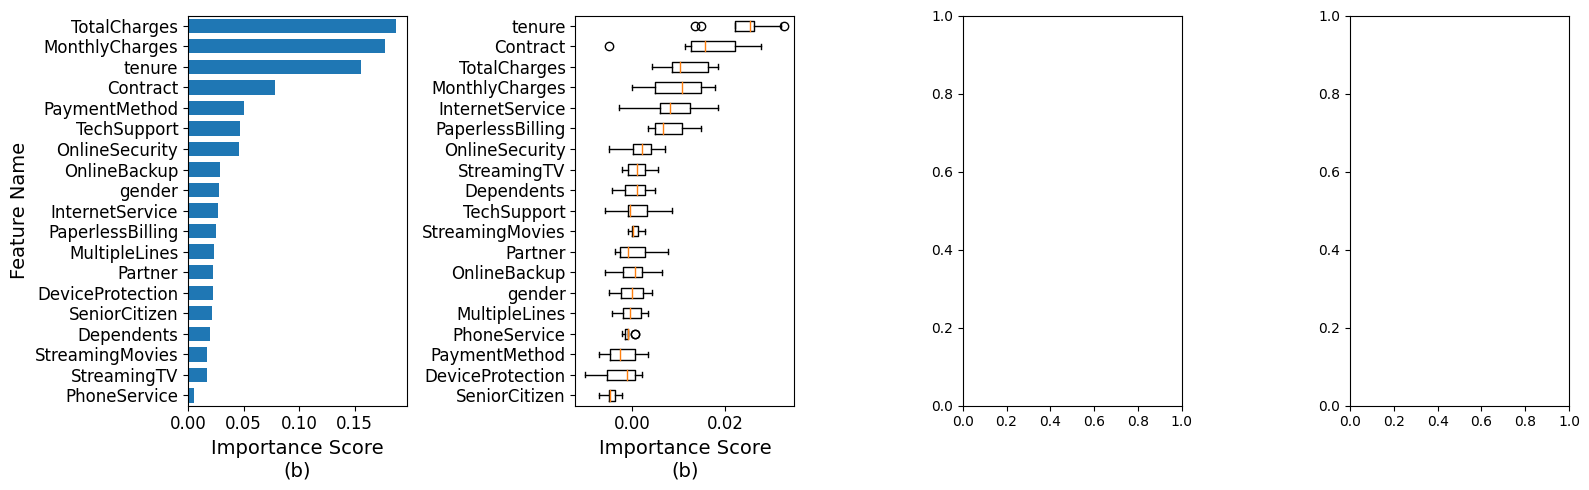

In [79]:
# feature importance from random forest
from sklearn.inspection import permutation_importance
feature_names = df.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()

In [80]:
# Create a series with feature importance 

ranfor_model.feature_importances_

array([0.02830852, 0.02178896, 0.02271079, 0.02012411, 0.15602874,
       0.00531323, 0.02311702, 0.02658318, 0.04573388, 0.02839918,
       0.02257443, 0.04654069, 0.01711597, 0.01732318, 0.07803729,
       0.02478098, 0.0502838 , 0.1776381 , 0.18759797])

In [81]:
column_names=list[df.columns]
column_names

list[Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')]

In [82]:
rfc_imp=[ranfor_model.feature_importances_]

In [83]:
rfc_colname=[df.columns]

In [84]:
rfc_dict={'Column_Names_rfc':rfc_colname,'feature_imp_rfc':rfc_imp}

In [85]:
rfc_feature_imp=pd.DataFrame(rfc_dict)

In [86]:
rfc_feature_rank=rfc_feature_imp.sort_values(by='feature_imp_rfc',ascending = False)

In [87]:
rfc_feature_rank

,Column_Names_rfc,feature_imp_rfc
0,"Index(['gender', 'SeniorCitizen', 'Partner', '...","[0.028308517699335213, 0.021788955357364165, 0..."


# **FEATURES IMPORTANCE:**

In [88]:
def calc_sens_spec(y_true,y_pred):
    conf_matrix = confusion_matrix(y_true,y_pred)
    TP = conf_matrix[1][1]
    TN = conf_matrix[0][0]
    FP = conf_matrix[0][1]
    FN = conf_matrix[1][0]
    # calculate the sensitivity
    sensitivity = TP / (TP + FN)    
    # calculate the specificity
    specificity = TN / (TN + FP)
    return sensitivity,specificity

# Random Forest

In [89]:
import time as timer
start = timer.time()
ranfor_model = RandomForestClassifier(n_estimators=100, random_state=42)
ranfor_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_ranfor = ranfor_model.predict(X_test)
y_ranfor_prob = ranfor_model.predict_proba(X_test)

Finished training within 0.62 seconds


Classification report for RF: 
              precision    recall  f1-score   support

           0       0.82      0.91      0.86      1035
           1       0.64      0.46      0.54       374

    accuracy                           0.79      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.78      0.79      0.78      1409

Confusion matrix for RF: 
[[939  96]
 [201 173]]
Accuracy score for RF: 0.79
Precision score for RF: 0.64
Recall score for RF: 0.46
F1 score for RF: 0.54
Sensitivity score for RF: 0.46
Specitivity score for RF: 0.91
AUC score for RF: 0.83


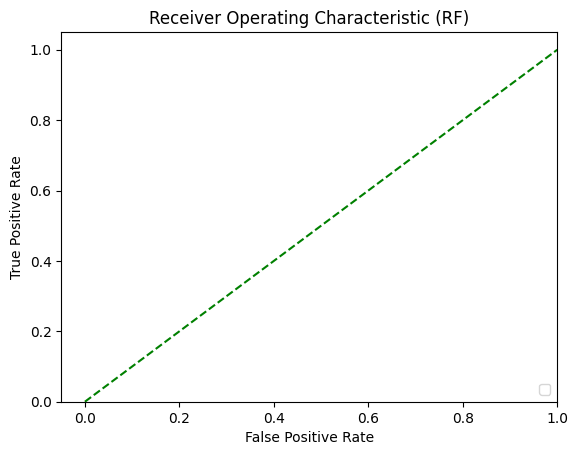

In [90]:
print("Classification report for RF: \n{}".format(classification_report(y_test,y_ranfor)))
print("Confusion matrix for RF: \n{}".format(confusion_matrix(y_test,y_ranfor)))
print("Accuracy score for RF: {:.2f}".format(accuracy_score(y_test,y_ranfor)))
# calculate precision, recall, and f1 scores
prec_ranfor = precision_score(y_test,y_ranfor)
rec_ranfor = recall_score(y_test,y_ranfor)
f1_ranfor = f1_score(y_test,y_ranfor)
print("Precision score for RF: {:.2f}".format(prec_ranfor))
print("Recall score for RF: {:.2f}".format(rec_ranfor))
print("F1 score for RF: {:.2f}".format(f1_ranfor))
# calculate sensitivity, specificity, and auc
sens_ranfor,spec_ranfor = calc_sens_spec(y_test,y_ranfor)

auc_ranfor = roc_auc_score(y_test, y_ranfor_prob[:,1])
print("Sensitivity score for RF: {:.2f}".format(sens_ranfor))
print("Specitivity score for RF: {:.2f}".format(spec_ranfor))
print("AUC score for RF: {:.2f}".format(auc_ranfor))
fig, ax = plt.subplots()
ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (RF)')
ax.legend(loc="lower right")
plt.show()

# Features Importance

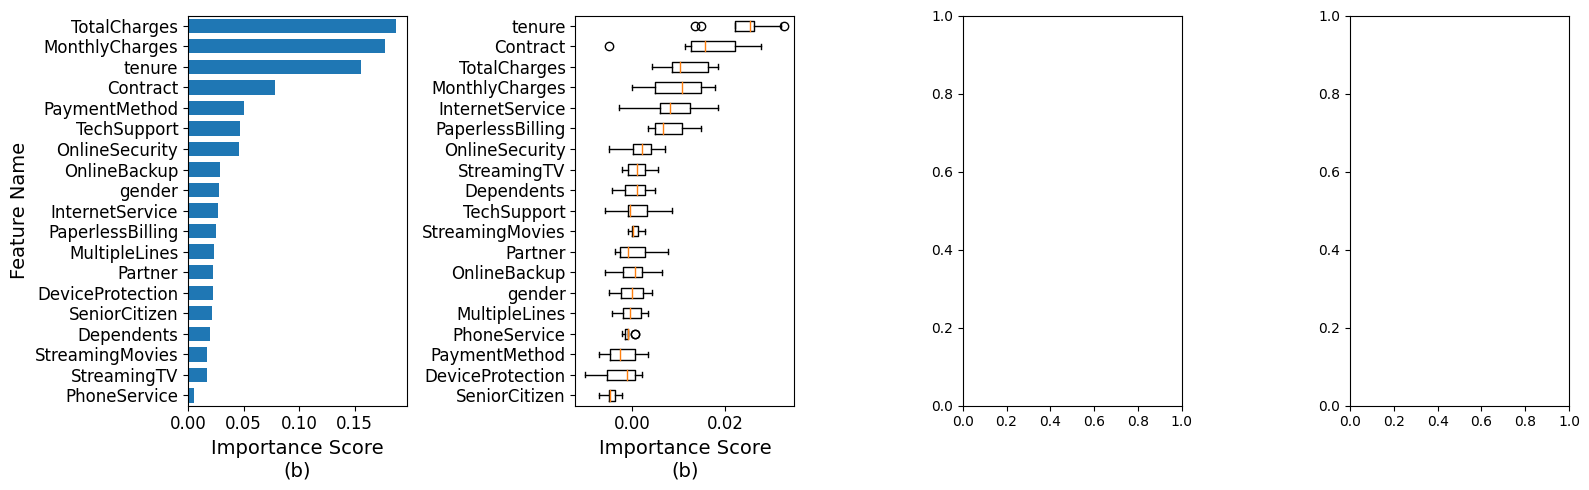

In [91]:
# feature importance from random forest
from sklearn.inspection import permutation_importance
feature_names = df.columns[:-1].to_numpy()
ranfor_perm_imp = permutation_importance(ranfor_model, X_test, y_test, n_repeats=10, random_state=42)
ranfor_perm_sort_idx = ranfor_perm_imp.importances_mean.argsort()

ranfor_tree_sort_idx = np.argsort(ranfor_model.feature_importances_)
ranfor_indices = np.arange(0, len(ranfor_model.feature_importances_)) + 0.5

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 5))
ax1.barh(ranfor_indices,ranfor_model.feature_importances_[ranfor_tree_sort_idx], height=0.7)
ax1.tick_params(axis='both', which='major', labelsize=12)
ax1.set_xlabel("Importance Score\n(b)",fontsize=14)
ax1.set_ylabel("Feature Name",fontsize=14)
ax1.set_yticklabels(feature_names[ranfor_tree_sort_idx])
ax1.set_yticks(ranfor_indices)
ax1.set_ylim((0, len(ranfor_model.feature_importances_)))
ax2.boxplot(ranfor_perm_imp.importances[ranfor_perm_sort_idx].T,vert=False,labels=feature_names[ranfor_perm_sort_idx])
ax2.tick_params(axis='both', which='major', labelsize=12)
ax2.set_xlabel("Importance Score\n(b)",fontsize=14)

fig.tight_layout()
fig.savefig("feature_importance.pdf", bbox_inches='tight')
plt.show()

# XGB

In [92]:
start = timer.time()
xgb_model = XGBClassifier(objective="binary:logistic", random_state=42)
xgb_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_xgb = xgb_model.predict(X_test)
y_xgb_prob = xgb_model.predict_proba(X_test)

Finished training within 0.82 seconds


In [ ]:
print("Classification report for XGB: \n{}".format(classification_report(y_test,y_xgb)))
print("Confusion matrix for XGB: \n{}".format(confusion_matrix(y_test,y_xgb)))
print("Accuracy score for XGB: {:.2f}".format(accuracy_score(y_test,y_xgb)))
# calculate precision, recall, and f1 scores
prec_xgb = precision_score(y_test,y_xgb)
rec_xgb = recall_score(y_test,y_xgb)
f1_xgb = f1_score(y_test,y_xgb)
print("Precision score for XGB: {:.2f}".format(prec_xgb))
print("Recall score for XGB: {:.2f}".format(rec_xgb))
print("F1 score for XGB: {:.2f}".format(f1_xgb))
# calculate sensitivity, specificity, and auc
sens_xgb,spec_xgb = calc_sens_spec(y_test,y_xgb)

auc_xgb = roc_auc_score(y_test, y_xgb_prob[:,1])
print("Sensitivity score for XGB: {:.2f}".format(sens_xgb))
print("Specitivity score for XGB: {:.2f}".format(spec_xgb))
print("AUC score for XGB: {:.2f}".format(auc_xgb))
fig, ax = plt.subplots()

ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (XGB)')
ax.legend(loc="lower right")
plt.show()

# Decision Tree

In [94]:
start = timer.time()
dtree_model = DecisionTreeClassifier(random_state=42)
dtree_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_dtree = dtree_model.predict(X_test)
y_dtree_prob = dtree_model.predict_proba(X_test)

Finished training within 0.03 seconds


In [ ]:
print("Classification report for DT: \n{}".format(classification_report(y_test,y_dtree)))
print("Confusion matrix for DT: \n{}".format(confusion_matrix(y_test,y_dtree)))
print("Accuracy score for DT: {:.2f}".format(accuracy_score(y_test,y_dtree)))
# calculate precision, recall, and f1 scores
prec_dtree = precision_score(y_test,y_dtree)
rec_dtree = recall_score(y_test,y_dtree)
f1_dtree = f1_score(y_test,y_dtree)
print("Precision score for DT: {:.2f}".format(prec_dtree))
print("Recall score for DT: {:.2f}".format(rec_dtree))
print("F1 score for DT: {:.2f}".format(f1_dtree))
# calculate sensitivity, specificity, and auc
sens_dtree,spec_dtree = calc_sens_spec(y_test,y_dtree)

auc_dtree = roc_auc_score(y_test, y_dtree_prob[:,1])
print("Sensitivity score for DT: {:.2f}".format(sens_dtree))
print("Specitivity score for DT: {:.2f}".format(spec_dtree))
print("AUC score for DT: {:.2f}".format(auc_dtree))
fig, ax = plt.subplots()

ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (DT)')
ax.legend(loc="lower right")
plt.show()

# Logistic Regression

In [96]:
start = timer.time()
logit_model = LogisticRegression(solver='lbfgs', random_state=42)
logit_model.fit(X_train, y_train)
end = timer.time()
print("Finished training within {:.2f} seconds".format(end-start))
# Predicting the test set results
y_logit = logit_model.predict(X_test)
y_logit_prob = logit_model.predict_proba(X_test)

Finished training within 0.03 seconds


In [ ]:
print("Classification report for LR: \n{}".format(classification_report(y_test,y_logit)))
print("Confusion matrix for LR: \n{}".format(confusion_matrix(y_test,y_logit)))
print("Accuracy score for LR: {:.2f}".format(accuracy_score(y_test,y_logit)))
# calculate precision, recall, and f1 scores
prec_logit = precision_score(y_test,y_logit)
rec_logit = recall_score(y_test,y_logit)
f1_logit = f1_score(y_test,y_logit)
print("Precision score for LR: {:.2f}".format(prec_logit))
print("Recall score for LR: {:.2f}".format(rec_logit))
print("F1 score for LR: {:.2f}".format(f1_logit))
# calculate sensitivity, specificity, and auc
sens_logit,spec_logit = calc_sens_spec(y_test,y_logit)

auc_logit = roc_auc_score(y_test, y_logit_prob[:,1])
print("Sensitivity score for LR: {:.2f}".format(sens_logit))
print("Specitivity score for LR: {:.2f}".format(spec_logit))
print("AUC score for LR: {:.2f}".format(auc_logit))
fig, ax = plt.subplots()

ax.plot([0, 1], [0, 1], color='green', linestyle='--')
ax.set_xlim([-0.05, 1.0])
ax.set_ylim([0.0, 1.05])
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.set_title('Receiver Operating Characteristic (LR)')
ax.legend(loc="lower right")
plt.show()

# **Combined Results:**

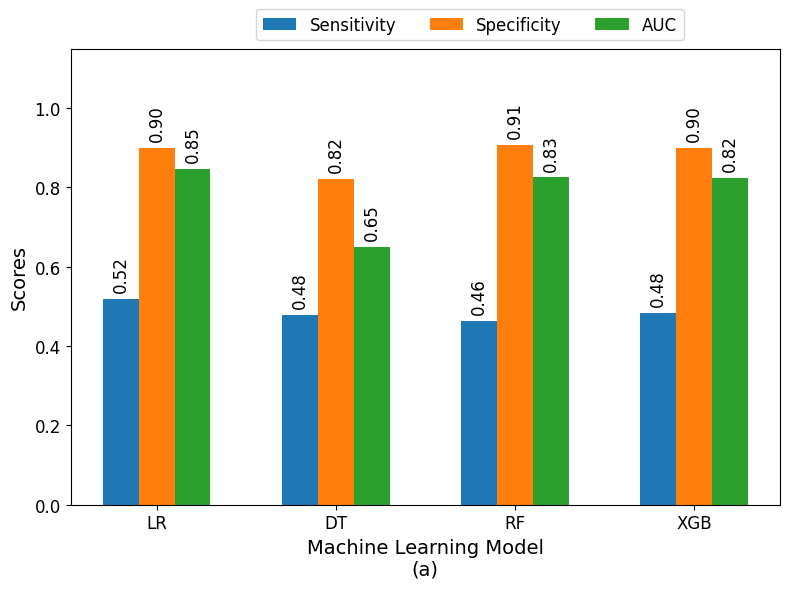

In [99]:
ml_names = ['LR', 'DT', 'RF', 'XGB']
sens_all = [sens_logit, sens_dtree, sens_ranfor, sens_xgb]
spec_all = [spec_logit, spec_dtree, spec_ranfor, spec_xgb]
auc_all = [ auc_logit, auc_dtree, auc_ranfor, auc_xgb]

prec_all = [prec_logit, prec_dtree, prec_ranfor,  prec_xgb]
rec_all = [rec_logit, rec_dtree, rec_ranfor, rec_xgb]
f1_all = [f1_logit, f1_dtree, f1_ranfor,f1_xgb]

def autolabel(bars):
    """Attach a text label above each bar in displaying its height."""
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{:.2f}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 5),  # 3 points vertical offset
                    textcoords="offset points",
                    fontsize=12,
                    rotation=90,
                    ha='center', va='bottom')

width = 0.20  # the width of the bars
r1 = np.arange(len(ml_names))  # the label locations
r2 = [x + width for x in r1]
r3 = [x + width for x in r2]
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, sens_all, width, label='Sensitivity')
bar2 = ax.bar(r2, spec_all, width, label='Specificity')
bar3 = ax.bar(r3, auc_all, width, label='AUC')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.15])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(a)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_auc.pdf", bbox_inches='tight')
plt.show()

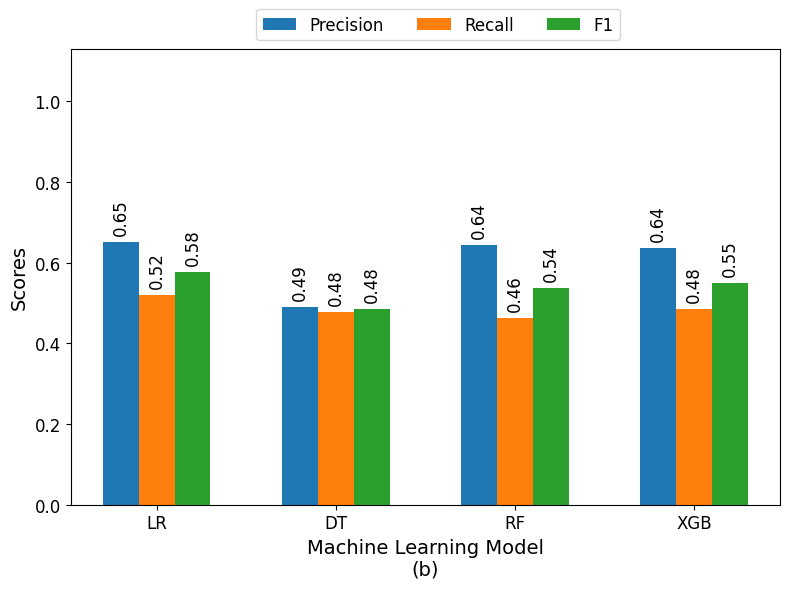

In [100]:
# plot sensitivity, specificity, and auc
fig, ax = plt.subplots(figsize=(8,6))
bar1 = ax.bar(r1, prec_all, width, label='Precision')
bar2 = ax.bar(r2, rec_all, width, label='Recall')
bar3 = ax.bar(r3, f1_all, width, label='F1')
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylim([0,1.13])
ax.set_ylabel('Scores',fontsize=14)
#ax.set_title('Performance benchmark across ML models')
ax.set_xticks(r2)
ax.set_xticklabels(ml_names)
ax.tick_params(axis='both', which='major', labelsize=12)
ax.set_xlabel("Machine Learning Model\n(b)",fontsize=14)
ax.legend(loc='lower left',ncol=3,bbox_to_anchor=(0.25,1),fontsize=12)
autolabel(bar1)
autolabel(bar2)
autolabel(bar3)
fig.tight_layout()
fig.savefig("ml_benchmark_f1.pdf", bbox_inches='tight')
plt.show()